In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from scipy import integrate

In [2]:
#Some predefined parameters

P = 1000 #Denotes laser power
K = 20 #Thermal conductivity
V = 0.1 #Speed of the laser
alp = 1/100000 #Thermal diffusivity
c_1 = P/(2*math.pi*K) #just a constant = P/(2pi*K) for simplifying further calculations
c_2 = V/(2*alp) #Another constant = V/(2alp)
T_0 = 300 #Pre-heating

# Now that we have defined parameters, we can calculate the temperature function : T(x,y) = T_0 + c_1 * exp[-c_2*(x+R)+R] / R                                                  Here c_1 and c_2 are condition dependent constants calculated above, and R is radial distance from the origin, and R(x,y) = sqrt(x^2+y^2)

## The following block of code defines a method that calculates the temperature at the input points

In [3]:
#This function outputs temperature at the input points.
def calculateT():
    mm_x = float(input('Enter the x distance in mm: ')) #Distance from the laser origin along the x direction in milli metres
    mm_y = float(input('Enter the y distance in mm: ')) #Distance from the laser origin along the y direction in milli metres
    m_x = mm_x/1000 #mm to metre conversion
    m_y = mm_y/1000 
    R = math.sqrt(m_x**2 + m_y**2) #Radial distance from origin
    out_T = T_0 + c_1/R * math.exp(-c_2 * (m_x + R)) #Temperature T(x,y) calculated using the same formula as above
    print(str(out_T) + ' K')

In [4]:
#We can use the above function by just calling it and inputting the point coordinates: 
calculateT()

Enter the x distance in mm: 0
Enter the y distance in mm: 0


ZeroDivisionError: float division by zero

## The following block of code plots an interactive contour which represents the temperature gradient with changing x and y. We can play around with various parameters to see how the temperature distribution changes with changing parameters

In [5]:
#The following libraries will be used as they have some methods that will help us in making our contour plot interactive

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
def T(P,K,V,alp):
# P = 1000 #Denotes laser power
# K = 20 #Thermal conductivity
# V = 0.1 #Speed of the laser
# alp = 1/100000 #Thermal diffusivity
    c_1 = P/(2*math.pi*K) #just a constant = P/(2pi*K) for simplifying further calculations
    c_2 = V/(2*alp/1000000) #Another constant = V/(2alp)
    T_0 = 300 #Pre-heating
    x1 = np.linspace(-30,-2,500)
    x2 = np.linspace(0.5,5,500)
    x = np.union1d(x1,x2)
    y = np.linspace(-4, 4,500)
    [X, Y] = np.meshgrid(x, y)
    fig, ax = plt.subplots(1, 1)
    T = T_0 + c_1/(np.sqrt(np.square(X/1000)+np.square(Y/1000)))*np.exp(-c_2*(X/1000 + np.sqrt(np.square(X/1000)+np.square(Y/1000))))
    CS = plt.contourf(X, Y, T, 15, cmap='rainbow')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.colorbar()
    

interact(T, P=(0,1000,100),K=(0,20,1),V=0.1,alp=(5,15,1))

interactive(children=(IntSlider(value=500, description='P', max=1000, step=100), IntSlider(value=10, descripti…

<function __main__.T(P, K, V, alp)>

## The following method will be used to calculate the temperature at a point by clicking at its location in the image

In [7]:
#This first function calculates temperature at the given points
def calcT(x, y):
    m_x = x/1000
    m_y = y/1000
    out_R = math.sqrt(m_x**2 + m_y**2)
    P = 1000 #Denotes laser power
    K = 20 #Thermal conductivity
    V = 0.1 #Speed of the laser
    alp = 1/100000 #Thermal diffusivity
    c_1 = P/(2*math.pi*K) #just a constant = P/(2pi*K) for simplifying further calculations
    c_2 = V/(2*alp) #Another constant = V/(2alp)
    T_0 = 300 #Pre-heating
    out_T = T_0 + c_1/out_R * math.exp(-c_2 * (m_x + out_R))
    return out_T


# This function to display the coordinates of the points clicked on the image and then passes those to the first function 
# to calculate the temperature at that point
def click_event(event, x, y, flags, params):
    global img
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        #print(x, ' ', y)
        actual_x = 0.0704 * x -35.6338
        actual_y = -0.0216216 * y + 5.254054
        print(actual_x, ' ', actual_y)
        Temperature = calcT(actual_x, actual_y)
        print(int(Temperature), ' K')
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        x_co = round(actual_x, 3)
        y_co = round(actual_y, 3)
        Temperature = round(Temperature, 3)
        cv2.putText(img, 'x: '+str(x_co) + ' mm', (x,y), font,
                    0.5, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.putText(img, 'y: '+str(y_co) + ' mm', (x,y+15), font,
                    0.5, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.putText(img, 'T: '+str(Temperature) + ' K', (x,y+30), font, 
                    0.5, (0, 0, 255), 1, cv2.LINE_AA)
        cv2.imshow('image', img)
        
    if event==cv2.EVENT_RBUTTONDOWN:
        #Removing the earlier texts and load fresh image
        img = cv2.imread('temp.png', 1)
        cv2.imshow('image', img)
        cv2.setMouseCallback('image', click_event)

        
if __name__=="__main__":
 
    # reading the image
    img = cv2.imread('temp.png', 1)
 
    # displaying the image
    cv2.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
 
    # close the window
    cv2.destroyAllWindows()
# x_actual=0.0704x-35.6338// x = click x coordinate, x_actual = actual x coordinate
# y_actual=-0.021164y+5.0582


-22.6098   1.0594636
610  K
-30.072200000000002   3.9567579999999998
371  K
5.057400000000001   -3.9567476
300  K


In [45]:
def mouse_event(event):
    print('x: {} and y: {}'.format(event.xdata, event.ydata))
    
    
def T(P,K,V,alp):
    
# P = 1000 #Denotes laser power
# K = 20 #Thermal conductivity
# V = 0.1 #Speed of the laser
# alp = 1/100000 #Thermal diffusivity
    c_1 = P/(2*math.pi*K) #just a constant = P/(2pi*K) for simplifying further calculations
    c_2 = V/(2*alp/1000000) #Another constant = V/(2alp)
    T_0 = 300 #Pre-heating
    x1 = np.linspace(-30,-2,500)
    x2 = np.linspace(0.5,5,500)
    x = np.union1d(x1,x2)
    y = np.linspace(-4, 4,500)
    [X, Y] = np.meshgrid(x, y)
    fig, ax = plt.subplots(1, 1)
    T = T_0 + c_1/(np.sqrt(np.square(X/1000)+np.square(Y/1000)))*np.exp(-c_2*(X/1000 + np.sqrt(np.square(X/1000)+np.square(Y/1000))))
    CS = plt.contourf(X, Y, T, 15, cmap='rainbow')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
interact(T, P=(0,1000,100),K=(0,20,1),V=0.1,alp=(5,15,1))
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', mouse_event)


def calcT(x, y):
    m_x = x/1000
    m_y = y/1000
    out_R = math.sqrt(m_x**2 + m_y**2)
    P = 1000 #Denotes laser power
    K = 20 #Thermal conductivity
    V = 0.1 #Speed of the laser
    alp = 1/100000 #Thermal diffusivity
    c_1 = P/(2*math.pi*K) #just a constant = P/(2pi*K) for simplifying further calculations
    c_2 = V/(2*alp) #Another constant = V/(2alp)
    T_0 = 300 #Pre-heating
    out_T = T_0 + c_1/out_R * math.exp(-c_2 * (m_x + out_R))
    return out_T




interactive(children=(IntSlider(value=500, description='P', max=1000, step=100), IntSlider(value=10, descripti…

<Figure size 432x288 with 0 Axes>

# Rough Work

In [2]:
'''Simple rosenthal implementation'''
T_0 = 300
P = 1000
K = 20
alpha = 1/100000
velocity = 0.1
c1 = P/(2*math.pi*K)
c2 = velocity/(2*alpha)
time_step = 0.2/1000
t = np.arange(0, 0.1, time_step)

x = -t*velocity
y = np.linspace(-4, 4,500)/1000
z = np.linspace(0, -10, 500)/1000
# R = np.sqrt(np.square(x)+np.square(y)+np.square(z))
[X,Y,Z] = np.meshgrid(x,y,z)
R = np.sqrt(X*X+Y*Y+Z*Z)
T = T_0 + c1*(np.exp(-c2*(X+R)))/R


In [76]:
'''Defining some parameters and the function that will be integrated'''
beta = 0.5
P = 100
R_l = 50*math.pow(10,-6)
c3 = beta*P/(np.pi*np.pi*R_l*R_l*K)
def f(x,y):
    T = c3*np.exp(-2*(x*x+y*y)/(R_l*R_l))*np.exp(c2*(R+x))/R
    return T

In [ ]:
'''Integration implementation. i and j denote x and y respectively'''
x_lower = 0
x_upper = R_l
y_lower = -np.sqrt(R_l*R_l-x*x)
y_upper = 
integrate.dblquad(f, x_lower, x_upper, -np.sqrt(R_l*R_l-x*x), np.sqrt(R_l*R_l-x*x))

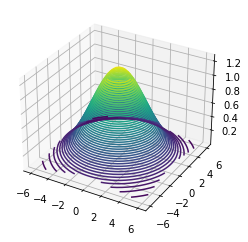

In [14]:
def f(x, y):
    beta = 0.5
    P = 100
    R_l = 50*math.pow(10,-6)
    return 2*beta*P/(np.pi*R_l*R_l)*np.exp(-2*(x*x+y*y)/30)
def d(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)

In [26]:
R_l = 1
f = lambda y, x: x*y
integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: np.sqrt(R_l*R_l-x*x))

(0.125, 2.1365437515743557e-15)

In [93]:
R_l = 50*math.pow(10,-6)
f = lambda y, x: np.exp(-2*(x*x+y*y)/(R_l*R_l))
integrate.dblquad(f, 0, R_l, lambda x: 0, lambda x: np.sqrt(R_l*R_l-x*x))

(8.488848889760277e-10, 6.459133589719679e-15)

405284734.5693512

In [94]:
R_l = 50*math.pow(10,-6)
z = 1/1000
f = lambda y, x: np.exp(-2*(x*x+y*y)/(R_l*R_l))*np.exp(-c2*(np.sqrt(x*x+y*y+z*z)+x))/np.sqrt(x*x+y*y+z*z)
integration_array = []
integrate.dblquad(f, 0, R_l, lambda x: 0, lambda x: np.sqrt(R_l*R_l-x*x))

(5.248553420271383e-09, 3.2042578539471225e-14)

In [ ]:
R_l = 50*math.pow(10,-6)
z = 1/1000
f = lambda y, x: np.exp(-2*(x*x+y*y)/(R_l*R_l))*np.exp(-c2*(np.sqrt(x*x+y*y+z*z)+x))/np.sqrt(x*x+y*y+z*z)
integration_array = []
integration_matrix = []
for i in range(len(x)):
    for j in range(len(y)):
        if(abs(x[i] < R_l)):
            integration_element = integrate.dblquad(f, 0, x[i], lambda x: 0, lambda x: np.sqrt(R_l*R_l-x*x))                
            integration_array.append(4*float(c3)*float(integration_element[0]))
    integration_matrix.append(integration_array)

<ipython-input-100-bbd4206f3429>:9: RuntimeWarning: invalid value encountered in sqrt
  integration_element = integrate.dblquad(f, 0, x[i], lambda x: 0, lambda x: np.sqrt(R_l*R_l-x*x))


In [38]:
import numpy as np

# Define some random data
Ndata = 500
data1 = np.random.uniform(.1, .8, Ndata)
data2 = np.random.uniform(.01, .2, Ndata)

# 1D function to integrate
def distFunc(x, c1=1., c2=.1):
    B1 = ((data1 - (1. / x)) / data2)**2
    B2 = ((x - c1) / c2)**2
    f = np.exp(-.5 * B1) * np.exp(-.5 * B2) / c2
    return f

# Values in x to evaluate the integral.
x = np.linspace(.1, 10, 100).reshape(-1, 1)

# Integral in x for each of the Ndata values defined above.
int_exp = np.trapz(distFunc(x), x, axis=0)

In [40]:
int_exp.shape

(500,)

In [51]:


import numpy as np

# Define some random data
Ndata = 500
data1 = np.random.uniform(.1, .8, Ndata)
data2 = np.random.uniform(.01, .2, Ndata)

# 1D function to integrate
def distFunc(x, c1=1., c2=.1):
    B1 = ((data1 - (1. / x)) / data2)**2
    B2 = ((x - c1) / c2)**2
    f = np.exp(-.5 * B1) * np.exp(-.5 * B2) / c2
    return f

def distFunc2d(x, y, c1=1.):
    B1 = ((data1 - (1. / x)) / data2)**2
    B2 = ((x - c1) / y)**2
    f = np.exp(-.5 * B1) * np.exp(-.5 * B2) / y
    return f

# Values in x to evaluate the integral.
x = np.linspace(.1, 10, 100)
y = np.linspace(.1, 10, 100)

# Integral in x for each of the Ndata values defined above.
int_exp = np.trapz(distFunc(x[:,np.newaxis]), x, axis=0)
int_exp2d = np.trapz(np.trapz(distFunc2d(x[:,np.newaxis],y[:,np.newaxis,np.newaxis]), y, axis=0), x, axis=0)

(500,)

In [ ]:
int

In [88]:
T_0 = 300
P = 1000
K = 20
alpha = 1/100000
velocity = 0.1
c1 = P/(2*math.pi*K)
c2 = velocity/(2*alpha)
time_step = 0.2/1000
t = np.arange(0, 0.1, time_step)
x = -t*velocity
y = np.linspace(-4, 4,500)/1000
z = np.linspace(0, -10, 500)/1000

In [77]:
beta = 0.5
P = 100
R_l = 50*math.pow(10,-6)
c3 = beta*P/(np.pi*np.pi*R_l*R_l*K)
int_exp2d*=abs(4*c3)

In [71]:
# 2D function to integrate
def distFunc(x, y):
    B1 = (x*x+y*y)/(R_l*R_l)
    R = np.sqrt(x*x+y*y+z*z)
    f = np.exp(-2 * B1) * np.exp(-c2 * (R+x)) / R
    return f

int_exp2d = np.trapz(np.trapz(distFunc(x[:,np.newaxis],y[:,np.newaxis,np.newaxis]), y, axis=0), x, axis=0)

In [78]:
abs(int_exp2d)

array([2.01305008e+11, 1.81825175e+11, 1.44077960e+11, 1.10050128e+11,
       8.42827791e+10, 6.54219790e+10, 5.15434810e+10, 4.11685001e+10,
       3.32757284e+10, 2.71718401e+10, 2.23818587e+10, 1.85746699e+10,
       1.55149181e+10, 1.30320987e+10, 1.10004791e+10, 9.32583334e+09,
       7.93651146e+09, 6.77731443e+09, 5.80521614e+09, 4.98632511e+09,
       4.29369239e+09, 3.70570688e+09, 3.20490501e+09, 2.77707684e+09,
       2.41058711e+09, 2.09585434e+09, 1.82494721e+09, 1.59126917e+09,
       1.38930987e+09, 1.21444800e+09, 1.06279352e+09, 9.31060906e+08,
       8.16466510e+08, 7.16645047e+08, 6.29581326e+08, 5.53554136e+08,
       4.87089946e+08, 4.28924518e+08, 3.77970987e+08, 3.33293202e+08,
       2.94083390e+08, 2.59643390e+08, 2.29368830e+08, 2.02735758e+08,
       1.79289305e+08, 1.58634061e+08, 1.40425872e+08, 1.24364846e+08,
       1.10189372e+08, 9.76709873e+07, 8.66099815e+07, 7.68316105e+07,
       6.81828371e+07, 6.05295188e+07, 5.37539785e+07, 4.77529026e+07,
      

In [ ]:
R_l = 50*math.pow(10,-6)
z=1/1000
f = lambda y, x: np.exp(-2*(x*x+y*y)/(R_l*R_l))*np.exp(-c3*(R+x))/np.sqrt(x*x+y*y+z*z)
integrate.dblquad(f, 0, R_l, lambda x: 0, lambda x: np.sqrt(R_l*R_l-x*x))

In [2]:
T_0 = 300
P = 1000
K = 20
alpha = 1/100000
velocity = 0.1
# c1 = P/(2*math.pi*K)
# c2 = velocity/(2*alpha)
time_step = 0.2/1000
t = np.arange(0, 0.1, time_step)
# x = -t*velocity
# y = np.linspace(-4, 4,500)/1000
# z = np.linspace(0, -10, 500)/1000

In [3]:
x_0 = t*velocity
y_0 = np.linspace(-4, 4,500)/1000
z_0 = np.linspace(0, -10, 500)/1000
x_0_norm = x_0*velocity/(2*alpha)
y_0_norm = y_0*velocity/(2*alpha)
z_0_norm = z_0*velocity/(2*alpha)
t_norm = t*velocity*velocity/(2*alpha)

In [4]:
[X_norm,Y_norm,Z_norm] = np.meshgrid(x_0_norm,y_0_norm,z_0_norm)
R_norm = np.sqrt(X_norm*X_norm+Y_norm*Y_norm+Z_norm*Z_norm)

In [5]:
R_norm.shape

(500, 500, 500)

In [6]:
### dT_norm/dt_norm ###

dTdt_norm = 0.5*np.exp(-X_norm-R_norm)*(1+X_norm/R_norm+X_norm/R_norm**2)/R_norm

In [7]:
dTdt_norm.shape

(500, 500, 500)

In [8]:
### dT_norm/dx_norm ###

dTdx_norm = -0.5*np.exp(-X_norm-R_norm)*(1+X_norm/R_norm+X_norm/R_norm**2)/R_norm

dTdy_norm = -0.5*Y_norm*np.exp(-X_norm-R_norm)*(1+1/R_norm)/R_norm**2

dTdz_norm = -0.5*Z_norm*np.exp(-X_norm-R_norm)*(1+1/R_norm)/R_norm**2

In [12]:
dTdy_norm.shape

(500, 500, 500)

In [14]:
# [DTDX_norm,DTDY_norm,DTDZ_norm] = np.meshgrid(dTdx_norm,dTdy_norm,dTdz_norm)
DelT_norm = np.sqrt(dTdx_norm**2+dTdy_norm**2+dTdz_norm**2)

In [15]:
### dT/dt ###
dTdt = P*(velocity**3)*dTdt_norm/(4*np.pi*K*alpha**2)

In [16]:
### Delta T ###
delT = P*(velocity**2)*DelT_norm/(4*np.pi*K*alpha**2)

16360039.212453626